In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import *
from keras import Sequential

In [2]:
data=pd.read_csv(r"C:\Users\sairam\Downloads\final_merged_data.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,...,gpsSpeed,gpsQuality,month,day,hour,minute,second,fault,location,output
0,0,161094,-0.016,9.780,9.790,-0.026,1.610,75.600,19.030938,3.8375,...,29.0,1.0,1,3,10,44,52,2,3,3
1,1,160627,-0.006,8.498,8.504,-0.032,1.494,65.450,19.030938,0.0000,...,0.0,0.0,4,3,8,37,4,2,3,3
2,2,1660743,-0.014,9.932,9.882,-0.030,1.480,73.875,19.161750,3.7400,...,0.0,0.0,4,24,1,18,40,2,3,3
3,3,105131,-0.008,8.048,8.052,-0.032,1.466,62.050,18.974875,0.0000,...,0.0,0.0,4,2,13,12,9,2,3,3
4,4,1833969,-0.010,8.606,8.610,-0.028,1.634,58.575,18.844062,0.0025,...,0.0,1.0,1,26,15,43,18,2,3,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410104 entries, 0 to 410103
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0.1     410104 non-null  int64  
 1   Unnamed: 0       410104 non-null  int64  
 2   TP2              410104 non-null  float64
 3   TP3              410104 non-null  float64
 4   H1               410104 non-null  float64
 5   DV_pressure      410104 non-null  float64
 6   Reservoirs       410104 non-null  float64
 7   Oil_temperature  410104 non-null  float64
 8   Flowmeter        410104 non-null  float64
 9   Motor_current    410104 non-null  float64
 10  COMP             410104 non-null  float64
 11  DV_eletric       410104 non-null  float64
 12  Towers           410104 non-null  float64
 13  MPG              410104 non-null  float64
 14  LPS              410104 non-null  float64
 15  Pressure_switch  410104 non-null  float64
 16  Oil_level        410104 non-null  floa

In [4]:
data=data.drop(['Unnamed: 0.1','Unnamed: 0','fault','location'],axis=1)

In [5]:
data.isnull().sum()

TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Flowmeter          0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
gpsLong            0
gpsLat             0
gpsSpeed           0
gpsQuality         0
month              0
day                0
hour               0
minute             0
second             0
output             0
dtype: int64

In [39]:
y=data['output']
x=data.drop(['output'],axis=1)

In [40]:
for i in x.columns:
    x[i]=(x[i]-np.min(x[i]))/(np.max(x[i])-np.min(x[i]))
x.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,...,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,month,day,hour,minute,second
count,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,...,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000,410104.000000
mean,0.108661,0.852213,0.727068,0.001295,0.206824,0.596970,0.524974,0.249494,0.855307,0.144700,...,0.082033,0.703269,0.312947,0.012185,0.313547,0.674415,0.534254,0.574860,0.498985,0.499780
std,0.280040,0.112813,0.302169,0.013039,0.198303,0.092452,0.187077,0.246021,0.351791,0.351798,...,0.274415,0.439060,0.463047,0.040251,0.463935,0.320496,0.401096,0.294183,0.294386,0.293551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001664,0.815001,0.787128,0.000484,0.142096,0.535091,0.528143,0.001662,1.000000,0.000000,...,0.000000,0.057389,0.000000,0.000000,0.000000,0.400000,0.066667,0.347826,0.237288,0.237288
50%,0.001848,0.861589,0.832085,0.000726,0.142676,0.606542,0.532351,0.409582,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.800000,0.566667,0.608696,0.491525,0.491525
75%,0.002033,0.911850,0.880692,0.001452,0.158337,0.650683,0.536560,0.425921,1.000000,0.000000,...,0.000000,1.000000,0.997575,0.000000,1.000000,1.000000,0.966667,0.826087,0.762712,0.745763
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
y.value_counts()

output
3    198000
2    195484
1     14821
0      1799
Name: count, dtype: int64

In [9]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=4)

In [10]:
np.unique(y)

array([0., 1.], dtype=float32)

In [11]:
y

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=.2)

In [13]:
x_test.shape

(82021, 25)

In [14]:
model=Sequential()
model.add(Dense(4,input_shape=([25]),activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile('adam','categorical_crossentropy',metrics=['categorical_accuracy','Precision','Recall','AUC'])

In [16]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/5
10253/10253 [==============================] - 26s 2ms/step - loss: 0.2537 - categorical_accuracy: 0.9103 - precision: 0.9164 - recall: 0.9015 - auc: 0.9889 - val_loss: 0.1367 - val_categorical_accuracy: 0.9617 - val_precision: 0.9621 - val_recall: 0.9612 - val_auc: 0.9956
Epoch 2/5
10253/10253 [==============================] - 26s 3ms/step - loss: 0.1183 - categorical_accuracy: 0.9668 - precision: 0.9673 - recall: 0.9663 - auc: 0.9966 - val_loss: 0.1043 - val_categorical_accuracy: 0.9699 - val_precision: 0.9702 - val_recall: 0.9696 - val_auc: 0.9972
Epoch 3/5
10253/10253 [==============================] - 27s 3ms/step - loss: 0.0982 - categorical_accuracy: 0.9710 - precision: 0.9714 - recall: 0.9705 - auc: 0.9975 - val_loss: 0.0923 - val_categorical_accuracy: 0.9736 - val_precision: 0.9739 - val_recall: 0.9733 - val_auc: 0.9977
Epoch 4/5
10253/10253 [==============================] - 27s 3ms/step - loss: 0.0871 - categorical_accuracy: 0.9741 - precision: 0.9745 - recall: 0.

In [17]:
model.evaluate(x_train,y_train)

10253/10253 [==============================] - 20s 2ms/step - loss: 0.0697 - categorical_accuracy: 0.9792 - precision: 0.9793 - recall: 0.9790 - auc: 0.9984


[0.06969010084867477,
 0.979154646396637,
 0.9793063998222351,
 0.9789870381355286,
 0.9983869791030884]

In [18]:
model.evaluate(x_test,y_test)

2564/2564 [==============================] - 3s 1ms/step - loss: 0.0711 - categorical_accuracy: 0.9789 - precision: 0.9790 - recall: 0.9787 - auc: 0.9983


[0.07111015170812607,
 0.9788590669631958,
 0.9789504408836365,
 0.978663980960846,
 0.9982846975326538]

2564/2564 [==============================] - 2s 873us/step
Axes(0.125,0.125;0.62x0.755)


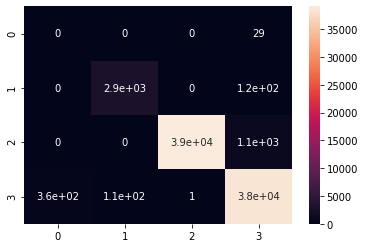

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
o=model.predict(x_test)
ou=np.argmax(o,axis=1)
i=np.argmax(y_test,axis=1)
print(sns.heatmap(confusion_matrix(ou,i),annot=True))

In [20]:
print(classification_report(ou,i))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.96      0.96      0.96      2974
           2       1.00      0.97      0.99     40212
           3       0.97      0.99      0.98     38806

    accuracy                           0.98     82021
   macro avg       0.73      0.73      0.73     82021
weighted avg       0.98      0.98      0.98     82021



In [21]:
corr=data.corr()
print(corr['output'])

TP2               -0.085389
TP3                0.308661
H1                 0.213090
DV_pressure        0.030267
Reservoirs         0.291573
Oil_temperature   -0.245255
Flowmeter         -0.301354
Motor_current     -0.031444
COMP               0.190714
DV_eletric        -0.190714
Towers             0.130306
MPG                0.190718
LPS               -0.380579
Pressure_switch    0.284434
Oil_level          0.284551
Caudal_impulses    0.282527
gpsLong           -0.327834
gpsLat             0.328565
gpsSpeed           0.261477
gpsQuality         0.328694
month             -0.362081
day               -0.088577
hour              -0.020455
minute             0.008450
second            -0.000725
output             1.000000
Name: output, dtype: float64


In [22]:
!pip install imblearn


[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
data['output'].value_counts()

output
3    198000
2    195484
1     14821
0      1799
Name: count, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
over=SMOTE(sampling_strategy={0:198000, 1:198000,2:198000})
under = RandomUnderSampler({3:198000})
from imblearn.pipeline import Pipeline
pipeline = Pipeline([('o', over), ('u', under)])
x_n,y=pipeline.fit_resample(x,y)

Pass sampling_strategy={3: 198000} as keyword args. From version 0.9 passing these as positional arguments will result in an error


In [43]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=4)

In [44]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_n,y,stratify=y,test_size=.2)

In [45]:
model1=Sequential()
model1.add(Dense(4,input_shape=([25]),activation='relu'))
model1.add(Dense(4,activation='relu'))
model1.add(Dense(4,activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 104       
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [46]:
model1.compile('adam','categorical_crossentropy',metrics=['categorical_accuracy','Precision','Recall','AUC'])

In [47]:
history1=model1.fit(x_train1,y_train1,epochs=5,batch_size=32,validation_data=(x_test1,y_test1))

Epoch 1/5
19800/19800 [==============================] - 53s 3ms/step - loss: 0.2001 - categorical_accuracy: 0.9336 - precision: 0.9549 - recall: 0.9148 - auc: 0.9929 - val_loss: 0.0638 - val_categorical_accuracy: 0.9835 - val_precision: 0.9835 - val_recall: 0.9835 - val_auc: 0.9980
Epoch 2/5
19800/19800 [==============================] - 57s 3ms/step - loss: 0.0583 - categorical_accuracy: 0.9857 - precision: 0.9857 - recall: 0.9857 - auc: 0.9980 - val_loss: 0.0547 - val_categorical_accuracy: 0.9852 - val_precision: 0.9852 - val_recall: 0.9852 - val_auc: 0.9981
Epoch 3/5
19800/19800 [==============================] - 56s 3ms/step - loss: 0.0492 - categorical_accuracy: 0.9883 - precision: 0.9883 - recall: 0.9883 - auc: 0.9982 - val_loss: 0.0462 - val_categorical_accuracy: 0.9880 - val_precision: 0.9881 - val_recall: 0.9880 - val_auc: 0.9984
Epoch 4/5
19800/19800 [==============================] - 55s 3ms/step - loss: 0.0452 - categorical_accuracy: 0.9894 - precision: 0.9894 - recall: 0.

In [48]:
model1.evaluate(x_train1,y_train1)

19800/19800 [==============================] - 39s 2ms/step - loss: 0.0414 - categorical_accuracy: 0.9895 - precision: 0.9895 - recall: 0.9895 - auc: 0.9987


[0.041422344744205475,
 0.9895060062408447,
 0.9895183444023132,
 0.9894933700561523,
 0.9986836910247803]

In [49]:
model1.evaluate(x_test1,y_test1)

4950/4950 [==============================] - 9s 2ms/step - loss: 0.0419 - categorical_accuracy: 0.9896 - precision: 0.9896 - recall: 0.9896 - auc: 0.9986


[0.041929516941308975,
 0.9896275401115417,
 0.989627480506897,
 0.9896212220191956,
 0.9986030459403992]

4950/4950 [==============================] - 4s 851us/step
Axes(0.125,0.125;0.62x0.755)


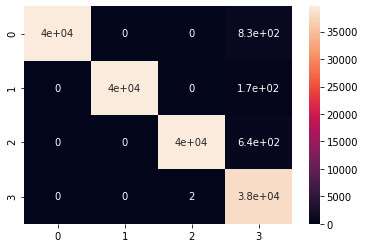

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
o1=model1.predict(x_test1)
ou1=np.argmax(o1,axis=1)
i1=np.argmax(y_test1,axis=1)
print(sns.heatmap(confusion_matrix(ou1,i1),annot=True))

In [51]:
print(classification_report(ou1,i1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     40426
           1       1.00      1.00      1.00     39772
           2       1.00      0.98      0.99     40241
           3       0.96      1.00      0.98     37961

    accuracy                           0.99    158400
   macro avg       0.99      0.99      0.99    158400
weighted avg       0.99      0.99      0.99    158400



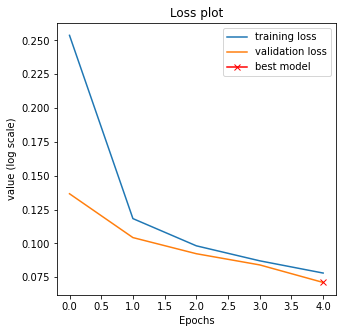

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Loss plot")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

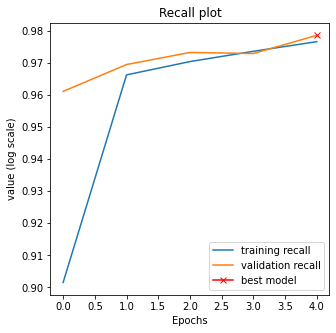

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title("Recall plot")
plt.plot(history.history["recall"], label="training recall")
plt.plot(history.history["val_recall"], label="validation recall")
plt.plot( np.argmax(history.history["val_recall"]), np.max(history.history["val_recall"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

In [54]:
!pip install lime


[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from lime import lime_tabular
lime_tabular.LimeTabularExplainer(data, mode='classification')

InvalidIndexError: (slice(None, None, None), 0)